# K Nearest Neighbors Project 

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv('KNN_Project_Data')

**Check the head of the dataframe.**

In [3]:
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

There are unknown columns as features and we want to predict the "TARGET CLASS".

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

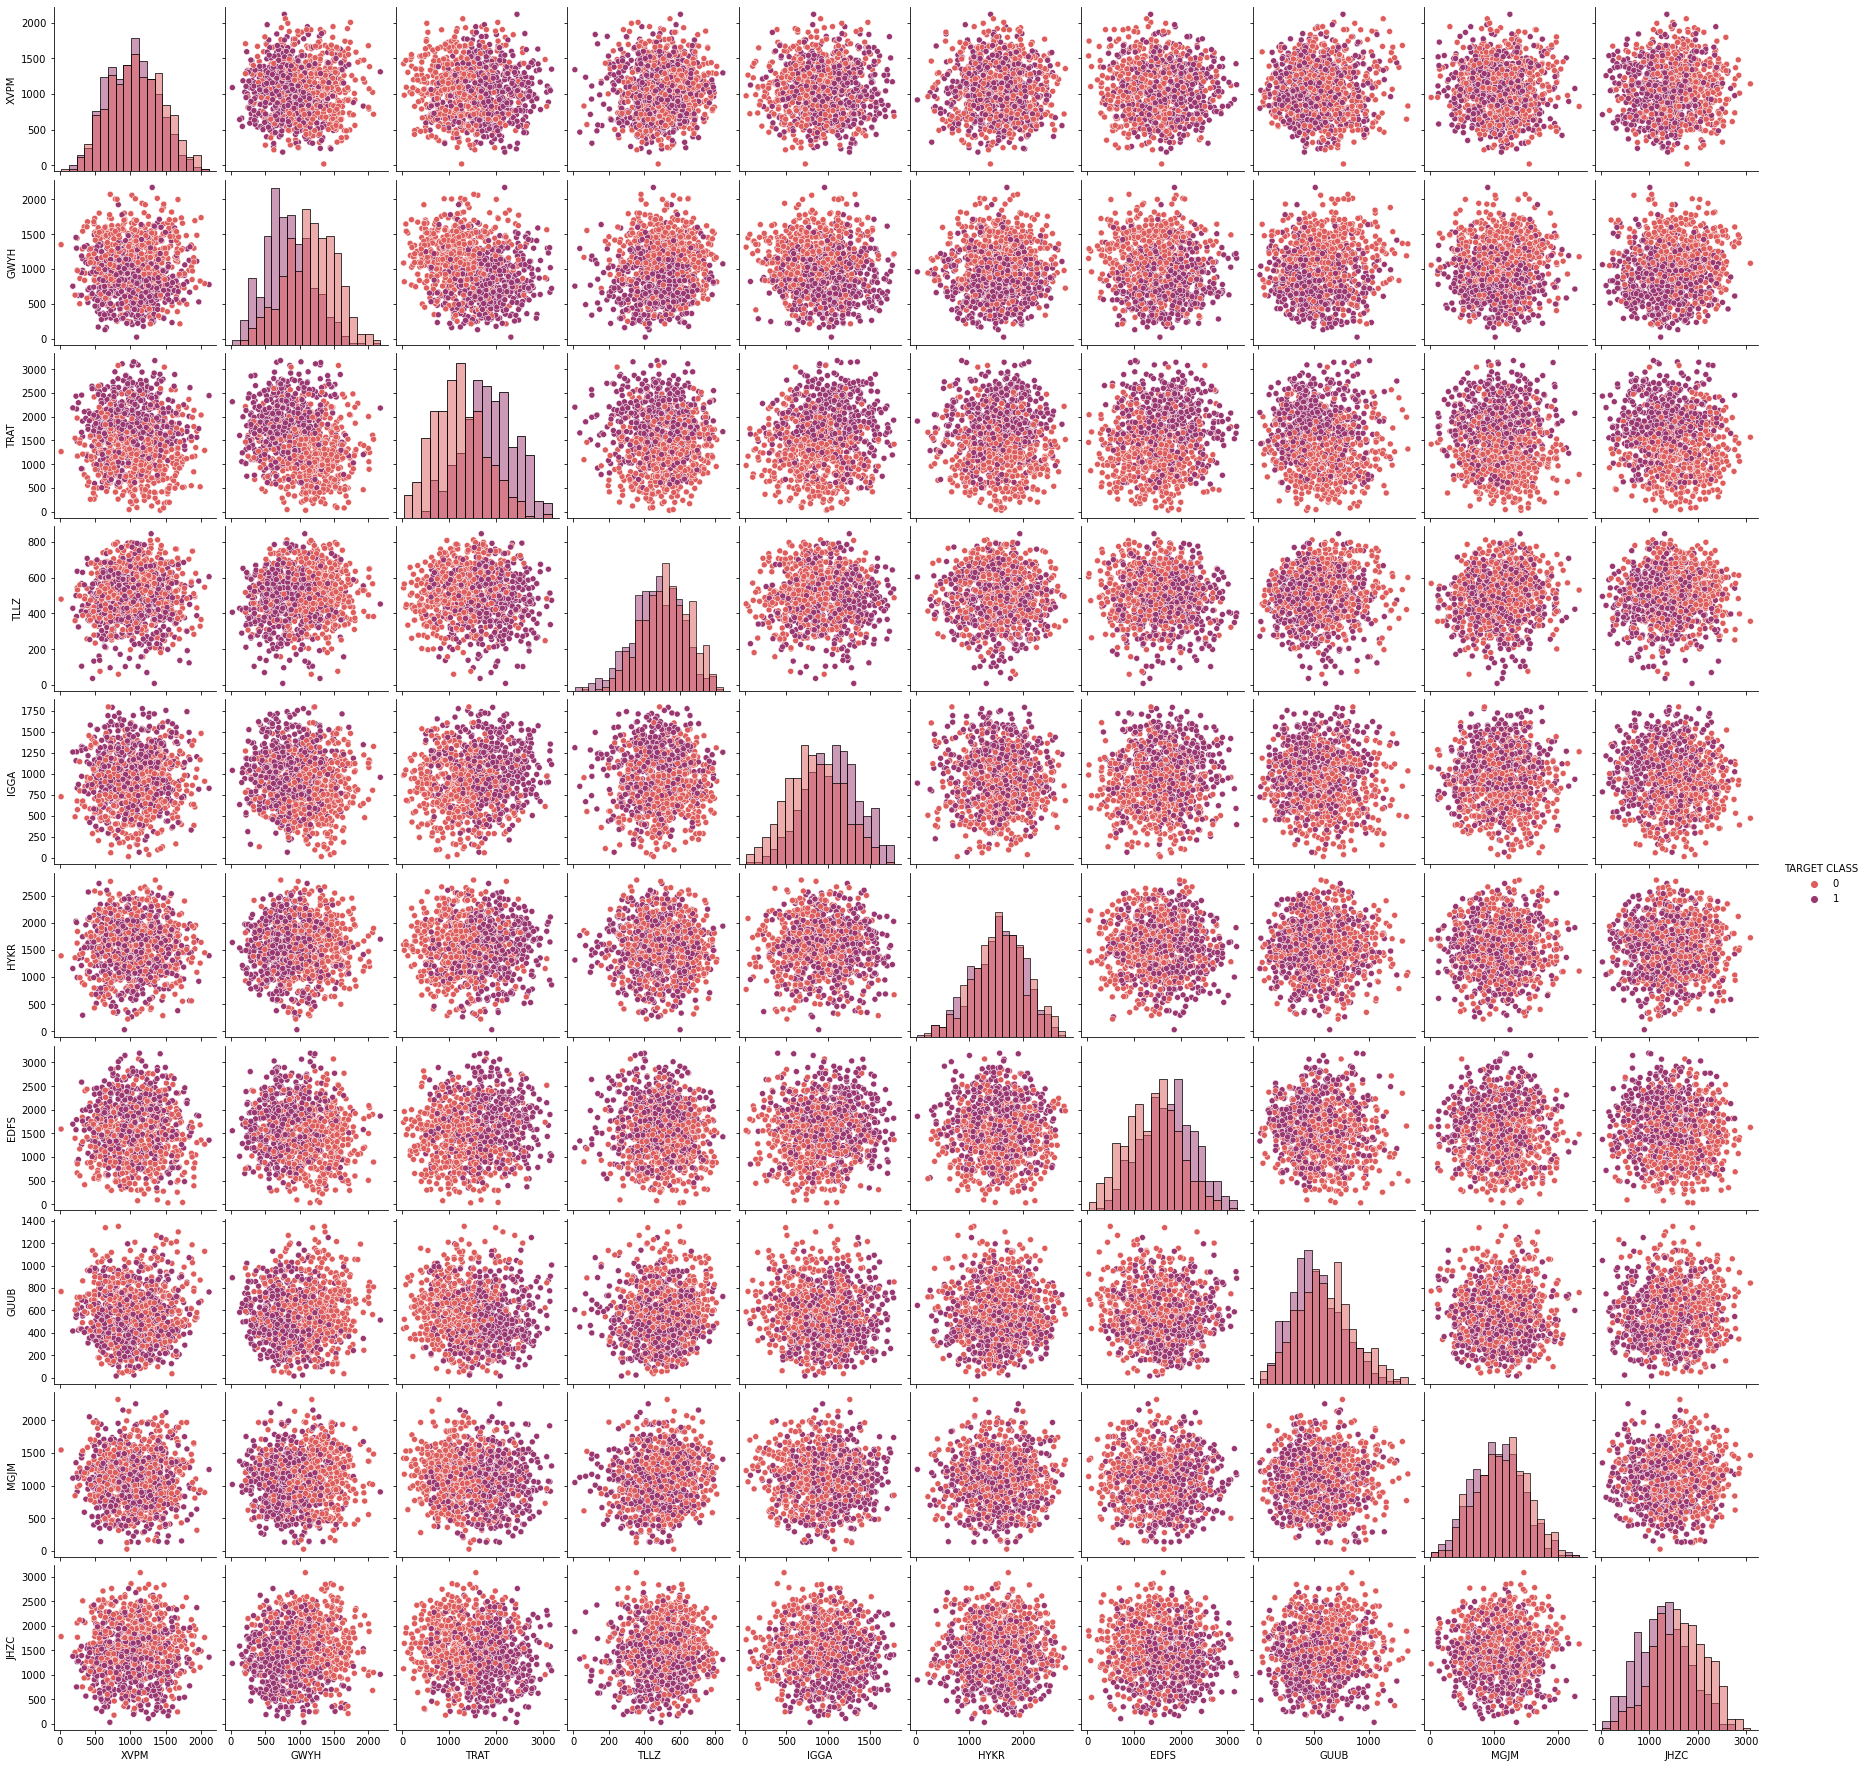

In [7]:
sns.pairplot(data = df, hue = 'TARGET CLASS',diag_kind='hist',palette ='flare')

# Standardize the Variables

Time to standardize the variables. In KNN the scale of variables matters a lot and any variable that are on large scale will have a much larger effect on the distance between observations. So when we use KNN as a classifier, we need to standardize everythong to the same scale

**Import StandardScaler from Scikit learn.**

In [8]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [9]:
scaler = StandardScaler()

**Fit scaler to the features.**

In [13]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

We want to fit scaler to data not to our TARGET CLASS.

**Use the .transform() method to transform the features to a scaled version.**

In [16]:
scaled = scaler.transform(df.drop('TARGET CLASS',axis=1))

Now we have a matrix of transformed data and we want to create a dataframe off of it.

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [18]:
df_feat = pd.DataFrame(data = scaled, columns=df.columns[:-1])

In [19]:
df_feat.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=101)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [23]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

we create a KNN model instance with K = 1 and later on optimize the K value and compare  ther result.

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [25]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations

Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [26]:
predictions = knn.predict(X_test)

**Create a confusion matrix and classification report.**

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[109  43]
 [ 41 107]]


              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



As we can see the from evaluation metrics the performance is not good in any of parameters and the average is 0.72. So we go ahead and find the best K value to optimize our model.

# Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [45]:
error_rate = []

for i in range (1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predictions_i = knn.predict(X_test)
    error_rate.append(np.mean(predictions_i != y_test))
    

**Now create a simple plot using the information from your for loop.**

Text(0, 0.5, 'Error Rate')

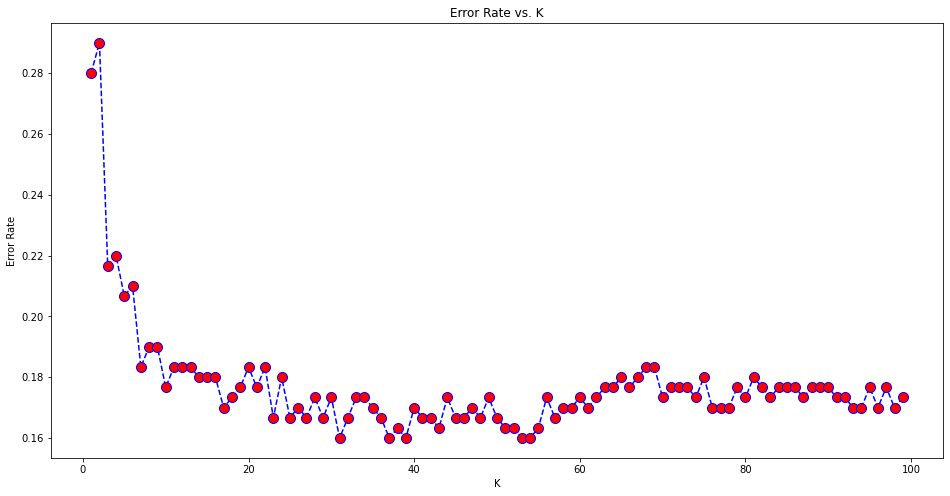

In [46]:
plt.figure(figsize=(16,8))
plt.plot(range(1,100),error_rate,color='blue',linestyle='--',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can observe that initially error rate is decreasing up to near 50. After that it starts to increase. So the value for optimum K should be around 52.

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [48]:
knn = KNeighborsClassifier(n_neighbors=52)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[127  25]
 [ 24 124]]


              precision    recall  f1-score   support

           0       0.84      0.84      0.84       152
           1       0.83      0.84      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



We can see that this model's prediction has better metrics results.